In [1]:
import sys
sys.path.append('/Users/mariana/Documents/projects/Graphs/egnn')

In [3]:
import os
import json
import matplotlib.pyplot as plt

In [5]:
path = '/Users/mariana/Documents/projects/Graphs/EGNN_VAE/'
c10 = 'nodes_10_community/exp_1/output.json'
c50 = 'nodes_50_community/exp_1/output.json'
out10 = json.load(open(os.path.join(path, c10), 'r'))
out50 = json.load(open(os.path.join(path, c50), 'r'))

In [7]:
out10.keys()

dict_keys(['train', 'val', 'test'])

In [9]:
out10['train'].keys()

dict_keys(['epoch', 'loss', 'bce', 'kl', 'kl_coords', 'adj_err', 'wrong_edges', 'gt_edges', 'possible_edges', 'tp', 'fp', 'fn'])

In [15]:
out50['train']['loss']

[1608.9353340087891, 848.9897768798828, 712.806738244629]

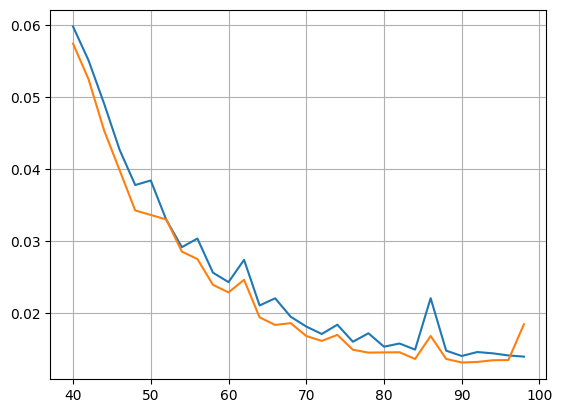

In [20]:
plt.plot(out10['train']['epoch'][20:], out10['train']['loss'][20:])
plt.plot(out10['val']['epoch'][20:], out10['val']['loss'][20:])
plt.grid()
plt.show()

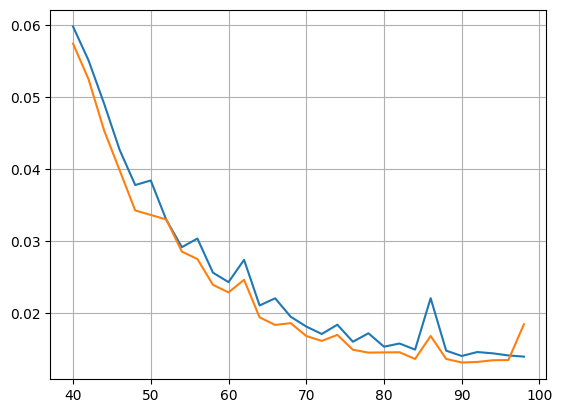

In [21]:
plt.plot(out10['train']['epoch'][20:], out10['train']['bce'][20:])
plt.plot(out10['val']['epoch'][20:], out10['val']['bce'][20:])
plt.grid()
plt.show()